# Линеаризация обратной связью


Рассматривается система управления, модель которой представляется в виде
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{g}(\mathbf{x}) \cdot \mathbf{u}, \quad \mathbf{x} \in \mathbb{R}^n, \quad, u \in \mathbb{R}$$

а уравнение выхода
$$y = h(\mathbf(x)), \quad y \in \mathbb{R}.$$

И ставится задача стабилизации нулевого равновесия $y = h(x) = 0$.

Поскольку $h(\mathbf{x})$ явно не зависит от управления, мы не можем найти закон управления $u(t)$ непосредственно из уравнения выхода. Вычислим производную $y$ в силу системы:

$$\dot{y} = L_f h(\mathbf{x})+L_g h(\mathbf{x}) \cdot u.$$

Если $L_g h(\mathbf{x}) \not\equiv 0$, можно составить _линейное_ дифференциальное уравнение $\dot{y} + k_0y = 0$ и подставиви в него выражения для $y$ и $\dot{y}$, выразить управление $u = u{\mathbf{x}}$. Если же $L_g h(\mathbf{x}) \equiv 0$, продолжим дифференцирование выражения $\dot{y} = L_f h(\mathbf{x})$.

Продолжая дифференцирование, мы придём к ситуации, когда в первый раз получим $L_g L_f^{r-1}h(\mathbf{x}) \not\equiv 0$, а все предыдущие производные Ли тождественно нулевые. Тогда, обознаяая _i_-ю производную $y$ через $y^{(i)}$, составим выражение

$$y^{(r)} + k_{r-1}y^{(r-1)} + \ldots +k_0 y = 0$$

и подставив в него выражения для всех производных, получим алгебраическое уравнение

$$L_f^r h(\mathbf{x}) + L_g L_f^{r-1}h(\mathbf{x})\cdot u + k_{r-1}L_f^{r-1}h(\mathbf{x}) + \ldots + k_0 h(\mathbf{x}) = 0.$$

Решив это уравнение относительно $u$, получим:
$$u(\mathbf{x}) = -\frac{L_f^r h(\mathbf{x}) + k_{r-1}L_f^{r-1}h(\mathbf{x}) + \ldots + k_0 h(\mathbf{x})}{L_g L_f^{r-1}h(\mathbf{x})}$$


Подробнее см. в:
Поляк Б.Т., Хлебников М.В., Рапопорт Л.Б. Математическая теория автоматического управления: учебной пособие. - М.:ЛЕНАНД, 2019

## Пример. Обращенный маятник на тележке

### Обозначения
$s : смещение \ тележки\ [м]; $ 

$\alpha : угол,\ который\ образует\ маятник\ с\ вертикалью\ [rad]; $

$u  : сила,\ приложенная\ к\ тележке,\ действующая\ как\ управляющий\ вход\ [Н]; $

$m  : масса\ тележки\ [кг]; $

$M  :  масса\ маятника\ [кг]; $

$l : длина\ маятника\ [м]; $

$g : ускорение\ свободного\ падения\ [м/с^2]; $

### Уравнения Лагранжа

Кинетическая энергия
$$T = \frac{m}{2}\left[(l\dot{\alpha}\cos{\alpha}+ \dot{s})^2 + (l\dot{\alpha}\sin{\alpha})^2\right] + \frac{M}{2}\dot{s}^2$$

Потенциальная энергия
$$\Pi = mgl\cos{\alpha}$$


Уравнения Лагранжа
$$\frac{d}{dt}\frac{\partial L(q, \dot{q}, t)}{\partial \dot{q}} - \frac{\partial L(q, \dot{q}, t)}{\partial q} = Q, \quad L(q, \dot{q}, t) = T - \Pi,$$
где $Q$ - обобщенные силы.

для обращенного маятника на тележке:
$$\left\{ 
\begin{array}\\
ml^2\ddot{\alpha} + ml\ddot{s}\cos{\alpha} - ml\dot{s}\dot{\alpha}\sin{\alpha}- mgl\sin{\alpha} = 0 \\
ml\ddot{\alpha}\cos{\alpha} + (m + M)\ddot{s} - ml\dot{\alpha}^2\sin{\alpha} = u
\end{array}
\right. 
$$

In [1]:
from sympy import Symbol, symbols, Function, Array, cos, sin, simplify, lambdify
from sympy.calculus.euler import euler_equations
from sympy.printing.latex import LatexPrinter, print_latex

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

In [2]:
M, m, g, l, t, u = symbols('M, m, g, l, t, u')
a = Function('alpha')(t)
w = Function('omega')(t)
s = Function('s')(t)
v = Function('v')(t)

# кинетическая энергия
T = Function('T')
T = 0.5 * (M + m)* (s.diff(t))**2 + 0.5 * m * l**2 * a.diff(t)**2 + m * l * s.diff(t) * a.diff(t) * cos(a)

# потенциальная эрергия
U = Function('U')
U = m * g * l * cos(a)

# лагранжиан
L = T - U

# левые части уравнений Лагранжа на угол и перемещение тележки
eqwA = euler_equations(L, a, t)
eqwS = euler_equations(L, s, t)

# подстановка обобщённых сил
Q = Array([0, -u])
eqwA[0] = eqwA[0].subs(eqwA[0].rhs, Q[0])
eqwS[0] = eqwS[0].subs(eqwS[0].rhs, Q[1])

# принт
print("Уравнения Лагранжа:")
display(eqwA)
display(eqwS)

Уравнения Лагранжа:


⎡                      ⎛        2                                             
⎢                      ⎜       d                    d        d                
⎢g⋅l⋅m⋅sin(α(t)) - l⋅m⋅⎜1.0⋅l⋅───(α(t)) - sin(α(t))⋅──(α(t))⋅──(s(t)) + cos(α(
⎢                      ⎜        2                   dt       dt               
⎣                      ⎝      dt                                              

      2      ⎞                                      ⎤
     d       ⎟                 d        d           ⎥
t))⋅───(s(t))⎟ - l⋅m⋅sin(α(t))⋅──(α(t))⋅──(s(t)) = 0⎥
      2      ⎟                 dt       dt          ⎥
    dt       ⎠                                      ⎦

⎡                        2                   2                   2           ⎤
⎢              ⎛d       ⎞                   d                   d            ⎥
⎢l⋅m⋅sin(α(t))⋅⎜──(α(t))⎟  - l⋅m⋅cos(α(t))⋅───(α(t)) - (M + m)⋅───(s(t)) = -u⎥
⎢              ⎝dt      ⎠                    2                   2           ⎥
⎣                                          dt                  dt            ⎦

## Синтез регулятора

В нормальной форме Коши уравнения обращённого маятника имеют вид:
$$\left\{ 
\begin{array}\\
\dot{\alpha} = \omega \\
\dot{\omega} = \frac{1}{(M+m\sin{\alpha}^2)l} \left[(M+m)g\sin{\alpha} - ml\omega^2\sin{\alpha}\cos{\alpha}-u\cos{\alpha}\right] \\
\dot{s} = v \\
\dot{v} = \frac{1}{(M+m\sin{\alpha}^2)} \left[-mg\sin{\alpha}\cos{\alpha} + ml\omega^2\sin{\alpha} + u\right]
\end{array}
\right. 
$$

Таким образом, система может быть записана в форме
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{g}(\mathbf{x}) \cdot \mathbf{u},$$

где
$$\mathbf{f}(\mathbf{x}) = 
\begin{pmatrix}
\omega\\
\frac{(M+m)g\sin{\alpha} - ml\omega^2\sin{\alpha}\cos{\alpha}}{(M+m\sin{\alpha}^2)l}\\
v\\
\frac{-mg\sin{\alpha}\cos{\alpha} + ml\omega^2\sin{\alpha}}{(M+m\sin{\alpha}^2)}
\end{pmatrix}, \quad
\mathbf{g}(\mathbf{x}) = 
\begin{pmatrix}
0\\
\frac{-\cos{\alpha}}{(M+m\sin{\alpha}^2)l}\\
0\\
\frac{1}{(M+m\sin{\alpha}^2)}
\end{pmatrix}
, \quad
\mathbf{x}=
\left(
\begin{array}\\
\alpha\\
\omega\\
s\\
v
\end{array}
\right).$$

In [3]:
from sympy.solvers import solve, nonlinsolve

# разрешаем уравнения Лагранжа относительно старших производных
alpha_ddot = solve(eqwA[0], a.diff(t, 2)) 
s_ddot = solve(eqwS[0], s.diff(t, 2))

# делаем замены вторых производных угла и положения на первые производные угловой и линейной скорости
eqwA_single_dot = eqwA[0].subs([(a.diff(t, 2), w.diff(t)), (s.diff(t, 2), v.diff(t))])
eqwS_single_dot = eqwS[0].subs([(a.diff(t, 2), w.diff(t)), (s.diff(t, 2), v.diff(t))])

# разрешаем систему уравнений относительно производных
cauchy_form = nonlinsolve((a.diff(t) - w, \
                           eqwA_single_dot.lhs, s.diff(t) - v, \
                           eqwS_single_dot.lhs - eqwS[0].rhs), \
                          a.diff(t), w.diff(t), s.diff(t), v.diff(t))

In [4]:
a_dot_rhs, w_dot_rhs, s_dot_rhs, v_dot_rhs = list(cauchy_form)[0]

a_dot_rhs_f, a_dot_rhs_g = a_dot_rhs.subs(u, 0), a_dot_rhs.diff(u)
w_dot_rhs_f, w_dot_rhs_g = w_dot_rhs.subs(u, 0), w_dot_rhs.diff(u)
s_dot_rhs_f, s_dot_rhs_g = s_dot_rhs.subs(u, 0), s_dot_rhs.diff(u)
v_dot_rhs_f, v_dot_rhs_g = v_dot_rhs.subs(u, 0), v_dot_rhs.diff(u)

print('Компоненты f:')
display([a_dot_rhs_f, w_dot_rhs_f, s_dot_rhs_f, v_dot_rhs_f])
print('Компоненты g:')
display([a_dot_rhs_g, w_dot_rhs_g, s_dot_rhs_g, v_dot_rhs_g])

Компоненты f:


⎡          ⎛                                     2               ⎞            
⎢          ⎜                                l⋅m⋅ω (t)⋅sin(2⋅α(t))⎟            
⎢      1.0⋅⎜M⋅g⋅sin(α(t)) + g⋅m⋅sin(α(t)) - ─────────────────────⎟        1.0⋅
⎢          ⎝                                          2          ⎠            
⎢ω(t), ───────────────────────────────────────────────────────────, v(t), ────
⎢                            ⎛         2      ⎞                               
⎣                          l⋅⎝M + m⋅sin (α(t))⎠                               

                                         ⎤
⎛  g⋅m⋅sin(2⋅α(t))        2             ⎞⎥
⎜- ─────────────── + l⋅m⋅ω (t)⋅sin(α(t))⎟⎥
⎝         2                             ⎠⎥
─────────────────────────────────────────⎥
                    2                    ⎥
           M + m⋅sin (α(t))              ⎦

Компоненты g:


⎡     -1.0⋅cos(α(t))               1.0       ⎤
⎢0, ────────────────────, 0, ────────────────⎥
⎢     ⎛         2      ⎞              2      ⎥
⎣   l⋅⎝M + m⋅sin (α(t))⎠     M + m⋅sin (α(t))⎦

## Вычисление производных Ли

Пусть цель управления - стабилизация углового положения маятника в нуле:
$$y = \alpha, \quad h(x) = \alpha \rightarrow 0$$

Последовательно вычисляя производные $h(x)$ в силу системы, получим, что относительная степень управляемой системы $r=2$
$$L_g L_f^{r-1}h(x)=-\frac{\cos{\alpha}}{(M + m\sin{\alpha}^2)l}$$

In [5]:
from sympy.diffgeom import *

#Нахождение производных Ли и относительной степени
K = Manifold("M", 4)
P = Patch("P", K)
xa, xw, xs, xv = symbols('xa, xw, xs, xv')
coord = CoordSystem("coord", P, [xa, xw, xs, xv])

ca, cw, cs, cv = coord.coord_functions()
e_a, e_w, e_s, e_v = coord.base_vectors()

f_x = a_dot_rhs_f * e_a + w_dot_rhs_f * e_w + s_dot_rhs_f * e_s + v_dot_rhs_f * e_v
g_x = a_dot_rhs_g * e_a + w_dot_rhs_g * e_w + s_dot_rhs_g * e_s + v_dot_rhs_g * e_v
f_x = f_x.subs([(a, ca), (w, cw), (s, cs), (w, cw)])
g_x = g_x.subs([(a, ca), (w, cw), (s, cs), (w, cw)])

Lf_arr = []
LgLf_arr = []
h = Function('h')(ca, cw, cs, cv)
h = ca
r = 0

Lf = Function('Lf')(ca, cw, cs, cv)
Lf = h
LgLf = Function('LgLf')(ca, cw, cs, cv)

while r == 0 or LgLf == 0:
    r += 1
    LgLf = LieDerivative(g_x, Lf)    
    Lf = LieDerivative(f_x, Lf)
    Lf_arr.append(Lf)
    LgLf_arr.append(LgLf)

for i in reversed(range(r)):
    Lf_arr[i] = Lf_arr[i].subs([(ca, a), (cw, w), (cs, s), (cv, v)])
    LgLf_arr[i] = LgLf_arr[i].subs([(ca, a), (cw, w), (cs, s), (cv, v)])
    
print("Относительная степень: r = ", r)
print("Производные Ли по направлению f: ")
display(Lf_arr)
print("Смешанные производные Ли: ")
display(LgLf_arr)

Относительная степень: r =  2
Производные Ли по направлению f: 


⎡          ⎛                                     2               ⎞⎤
⎢          ⎜                                l⋅m⋅ω (t)⋅sin(2⋅α(t))⎟⎥
⎢      1.0⋅⎜M⋅g⋅sin(α(t)) + g⋅m⋅sin(α(t)) - ─────────────────────⎟⎥
⎢          ⎝                                          2          ⎠⎥
⎢ω(t), ───────────────────────────────────────────────────────────⎥
⎢                            ⎛         2      ⎞                   ⎥
⎣                          l⋅⎝M + m⋅sin (α(t))⎠                   ⎦

Смешанные производные Ли: 


⎡     -1.0⋅cos(α(t))    ⎤
⎢0, ────────────────────⎥
⎢     ⎛         2      ⎞⎥
⎣   l⋅⎝M + m⋅sin (α(t))⎠⎦

## Закон управления

Тогда управление
$$u(x) = -\frac{L^2_f h(x) + k_1 L^1_f h(x) + k_0 h(x)}{L_g L_f^{r-1}h(x)}=\frac{(M+m)g\sin{\alpha}-ml\omega^2\sin{\alpha}\cos{\alpha} + l(M + m\sin{\alpha}^2)(k_1\omega+k_0\alpha)}{\cos{\alpha}},$$

где коэффициенты $k_1$ и $k_0$ таковы, что нулевое решение системы дифференциальных уравнений
$$\ddot{\alpha} + k_1\dot{\alpha} + k_0\alpha = 0$$
асимптотически устойчиво.

In [6]:
k1, k0 = symbols('k_1, k_0')
coeffs = [k1, 1]
u_fun = Function('U')(a, w, s, v)
u_fun = 0

for i in reversed(range(r)):    
    u_fun += Lf_arr[i] * coeffs[i]

u_fun += k0 * h.subs([(ca, a), (cw, w), (cs, s), (cv, v)])    
u_fun /= -LgLf_arr[r-1]    

display( "Закон управления u(x):", simplify(u_fun) )

'Закон управления u(x):'

                                                 2                        ⎛   
1.0⋅M⋅g⋅sin(α(t)) + 1.0⋅g⋅m⋅sin(α(t)) - 0.5⋅l⋅m⋅ω (t)⋅sin(2⋅α(t)) + 1.0⋅l⋅⎝M +
──────────────────────────────────────────────────────────────────────────────
                                                   cos(α(t))                  

      2      ⎞                    
 m⋅sin (α(t))⎠⋅(k₀⋅α(t) + k₁⋅ω(t))
──────────────────────────────────
                                  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

## Параметры и функция для правой части ДУ

In [8]:
class Parameters(object):
    pass

param = Parameters()
param.M = 1
param.m = 0.5
param.g = 10
param.l = 0.5

# critically damped case для расчёта коэффициентов k1 и k0
dzeta = 1

# замена значений паораметров
u_fun = u_fun.subs([(M, param.M), (m, param.m), (g, param.g), (l, param.l), (k1, dzeta**2), (k0, 2*dzeta)]) 
w_dot_rhs_f  = w_dot_rhs_f.subs([(M, param.M), (m, param.m), (g, param.g), (l, param.l)]) 
w_dot_rhs_g  = w_dot_rhs_g.subs([(M, param.M), (m, param.m), (g, param.g), (l, param.l)]) 
v_dot_rhs_f  = v_dot_rhs_f.subs([(M, param.M), (m, param.m), (g, param.g), (l, param.l)]) 
v_dot_rhs_g  = v_dot_rhs_g.subs([(M, param.M), (m, param.m), (g, param.g), (l, param.l)]) 

# вспомогательные функции для вычисления правой части ДУ и управления
control = lambdify((a, w, s, v), u_fun)
w_f = lambdify((a, w, s, v), w_dot_rhs_f)
w_g = lambdify((a, w, s, v), w_dot_rhs_g)
v_f = lambdify((a, w, s, v), v_dot_rhs_f)
v_g = lambdify((a, w, s, v), v_dot_rhs_g)

def rhs(t, x):
    
    u = control(x[0], x[1], x[2], x[3])        
    
    x_dot = np.zeros(4)

    x_dot[0] = x[1]
    x_dot[1] = w_f(x[0], x[1], x[2], x[3]) + w_g(x[0], x[1], x[2], x[3]) * u
    x_dot[2] = x[3]
    x_dot[3] = v_f(x[0], x[1], x[2], x[3]) + v_g(x[0], x[1], x[2], x[3]) * u
        
    return x_dot

## Интегрирование модели и визуализация

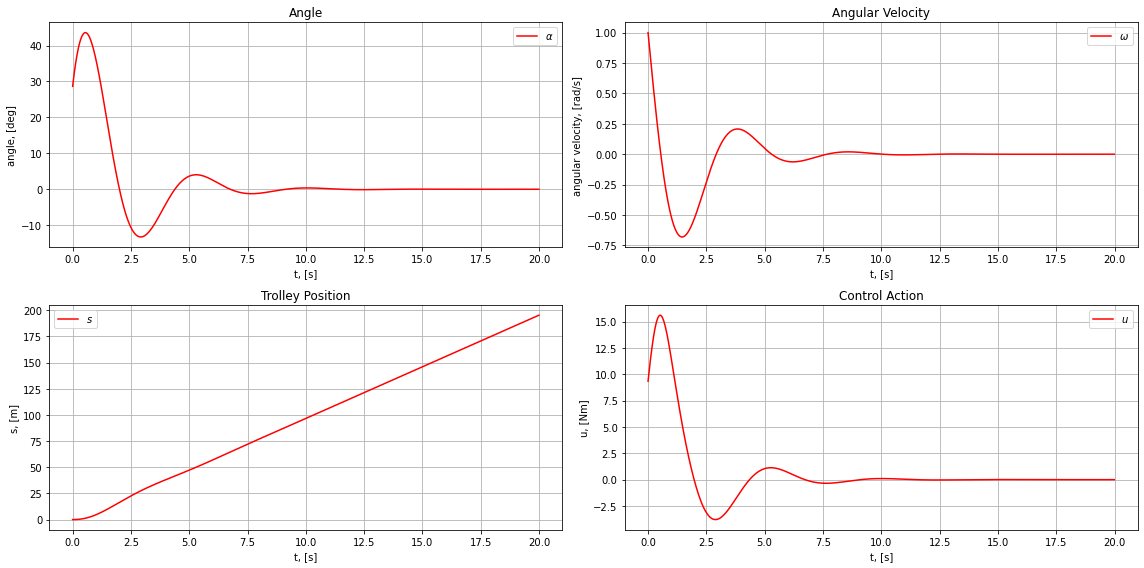

In [9]:
# начальные условия
x_0 = np.array([0.5, 1., 0., 0.])

t0 = 0.
tf = 20.
t_eval = np.arange(t0, tf, 0.01)

# решение ДУ
sol = solve_ivp(lambda t, x: rhs(t, x), (t0, tf), x_0, t_eval = t_eval)
x = sol.y.T
t = sol.t

# вычисление управляющего воздействия вдоль траектории
u = np.zeros((np.size(t), 1))
for i in range(np.size(t)):
    u[i] = control(x[i, 0], x[i, 1], x[i, 2], x[i, 3])

# визуализация   
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(2,2,1)

ax1.set_title("Angle")
ax1.plot(t, x[:, 0] * 180. / np.pi, label = r'$ \alpha $', color = 'red')
ax1.set_ylabel(r'angle, [deg]')
ax1.set_xlabel(r't, [s]')
ax1.grid(True)
ax1.legend()

ax2 = fig1.add_subplot(2,2,2)

ax2.set_title("Angular Velocity")
ax2.plot(t, x[:,1], label = '$\omega$', color = 'red')
ax2.set_ylabel(r'angular velocity, [rad/s]')
ax2.set_xlabel(r't, [s]')
ax2.grid(True)
ax2.legend()

ax3 = fig1.add_subplot(2,2,3)

ax3.set_title("Trolley Position")
ax3.plot(t, x[:,2], label = '$s$', color = 'red')
ax3.set_ylabel(r's, [m]')
ax3.set_xlabel(r't, [s]')
ax3.grid(True)
ax3.legend()

ax4 = fig1.add_subplot(2,2,4)

ax4.set_title("Control Action")
ax4.plot(t, u, label = '$u$', color = 'red')
ax4.set_ylabel(r'u, [Nm]')
ax4.set_xlabel(r't, [s]')
ax4.grid(True)
ax4.legend()

plt.tight_layout()

## Возможные задачи

1. Input-Output Feedback Linearization for the Control of a 4 Cable-Driven Parallel Robot
https://hal.archives-ouvertes.fr/hal-03229586/document


2. Input output feedback linearization control and variable step size MPPT algorithm of a grid-connected photovoltaic inverter
https://doi.org/10.1016/j.renene.2011.04.027


3. Feedback Linearization Control of the Inertia Wheel Pendulum
https://sciendo.com/pdf/10.2478/cait-2014-0036


4. Feedback linearization control of systems with singularities: a ball-beam revisit
http://control.dei.unipd.it/public/Schenato/TESI/Tosin_2009/materiale/Feedback%20linearization%20control.PDF


5. Robust feedback linearization for nonlinear processes control (пример с манипулятором)
https://doi.org/10.1016/j.isatra.2018.01.017